In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
import cv2
from PIL import Image
import tempfile
import imutils
import numpy as np
import  matplotlib.pyplot as plt
from textblob import TextBlob
from ipynb.fs.defs .Text_Extraction import image_resize,set_image_dpi,remove_noise_and_smooth,text_rotation,croping_image,order_points,four_point_transform,get_text,sentiment_analysis,word_cloud,send_mail,text_2_speech
import smtplib
import os
import re

# Reading  Image

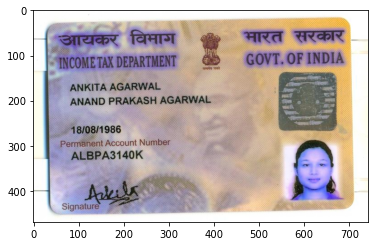

In [2]:
img=cv2.imread("pan_q.jpeg")
img1=image_resize(img)
plt.imshow(img1)

In [3]:
img1.shape

(469, 742, 3)

# Pre Processing images


# Setting DPI 

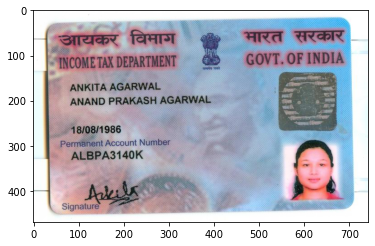

In [4]:
dpi_image=set_image_dpi("pan_q.jpeg")
plt.imshow(dpi_image)

# Croping Text

# "To crop the image following conditions should satisfy
    1.Four corners of the page should be visible
    2.Background of the image should be plain

Do you need to crop the outside of the image ?(Y/N)n
Image is considered to be croped


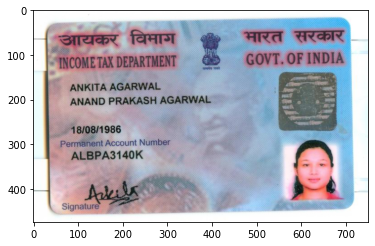

In [5]:
crop=str(input("Do you need to crop the outside of the image ?(Y/N)"))
if crop=="Y" or crop=="y":
    screenCnt =0
    croped_img=croping_image(dpi_image)
    cv2.imshow("dpi_image",croped_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    save=str(input("Do you want to save the croped image ?(Y/N)"))
    if save=="y" or save=="Y":
        croped_img=croped_img
    else:
        croped_img=dpi_image
        
else:
    print("Image is considered to be croped")
    croped_img=dpi_image
croped_img=image_resize(croped_img,750,750)
plt.imshow(croped_img)


# Rotating Image

Do you need to rotate the text?(Y/N)n
Image is considered to be in straight text


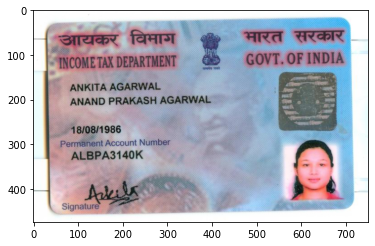

In [6]:
rotate=str(input("Do you need to rotate the text?(Y/N)"))
if rotate=="Y" or rotate=="y":
    rotated_img=text_rotation(croped_img)
else:
    print("Image is considered to be in straight text")
    rotated_img=croped_img
plt.imshow(rotated_img)


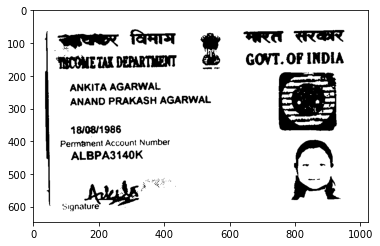

In [7]:

image = imutils.resize(rotated_img,1024,665)



    
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.threshold(gray,120, 255,cv2.THRESH_BINARY)[1]
gray = cv2.medianBlur(gray, 3)
plt.imshow(gray,cmap="gray")



# Extracting Details from PAN CARD

In [8]:
text=pytesseract.image_to_string(gray,lang='eng')
details=text.split("\n")
name=details[0]
date = str(re.findall(r"[\d]{1,4}[/-][\d]{1,4}[/-][\d]{1,4}", text)).replace("]", "").replace("[","").replace("'", "")
number = str(re.findall(r"[A-Z]{5}[0-9]{4}[A-Z]{1}", text)).replace("]", "").replace("[","").replace("'", "")
print("NAME :",name)
print("Date of Birth :",date)
print("PAN NUMBER :",number)

NAME : ANKITA AGARWAL
Date of Birth : 18/08/1986
PAN NUMBER : ALBPA3140K


# Extracting Signature 

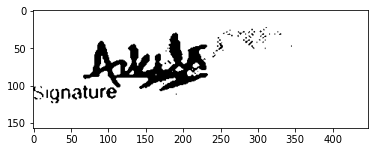

In [9]:
boxes = pytesseract.image_to_data(gray)
for a,b in enumerate(boxes.splitlines()):
    if a!=0:
        b = b.split()

            
        if len(b)==12:
            x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.putText(img,b[11],(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)    
            cv2.rectangle(img, (x,y), (x+w, y+h), (50, 50, 255), 2)
            if b[-1]=='Signature':
                sx,sy,sw,sh = int(b[6]),int(b[7]),int(b[8]),int(b[9])
sx=sx
sy=sy-100
sw=sw+sw+sw+sw
sh=sh
sign2= gray[sy:sy+sy+350, sx:sx+sw]
plt.imshow(sign2,cmap="gray")

# Displaying Image

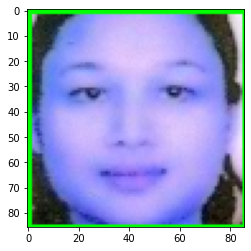

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 7)
for (x, y, w, h) in faces:
    ix = 0
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = img[y:y + h, x:x + w]
    plt.imshow(roi_color)